In this notebook, we will expiriment with polynomials of different degrees, and see how it corresponds to overfitting. We will make use of the diabetes dataset from SciKit learn.

In [4]:
import numpy as np
from sklearn import datasets

In [5]:
X, y = datasets.load_diabetes(return_X_y=True)

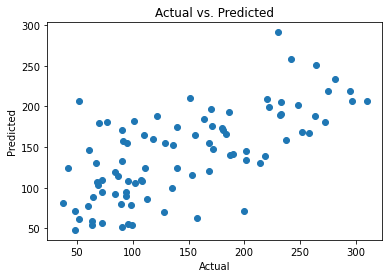

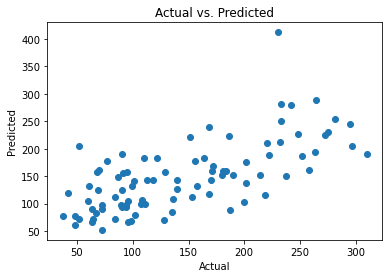

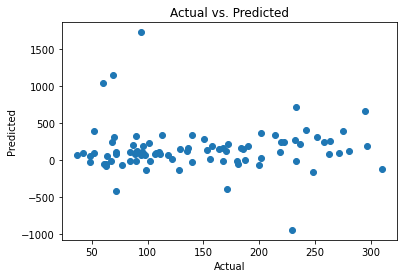

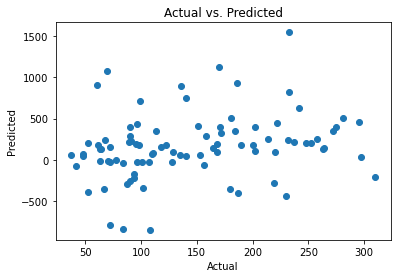

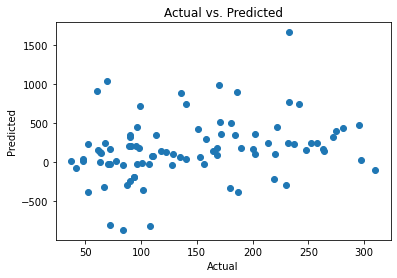

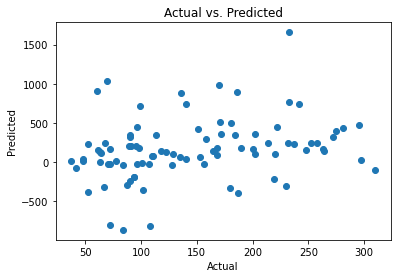

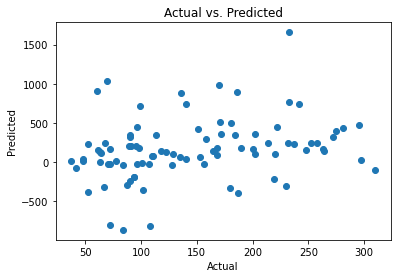

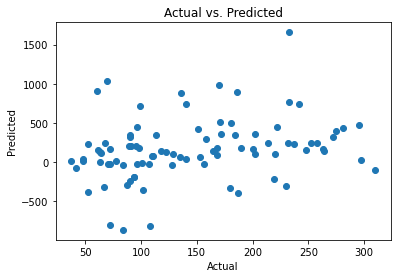

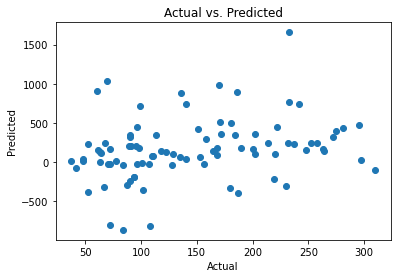

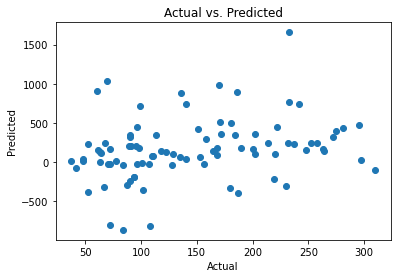

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error

rmse_list = []
degreeList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

for i in degreeList:

    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, 
                                                        y, train_size=0.8,
                                                        random_state=42)
    
    polyReg = LinearRegression()
    polyReg.fit(X_train, y_train)

    polyReg_predicted = polyReg.predict(X_test)
    polyReg_rmse = np.sqrt(mean_squared_error(y_test, polyReg_predicted))
    rmse_list.append(polyReg_rmse)
    


    plt.plot(y_test, polyReg_predicted, 'o')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.show()


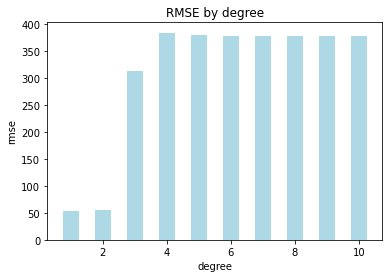

In [7]:
plt.bar(degreeList, rmse_list, color ='lightblue',width = 0.5)
 
plt.xlabel("degree")
plt.ylabel("rmse")
plt.title("RMSE by degree")
plt.show()

Here we can see that the root mean squared error increases dramatically after the first few degree increases. This is likely due to overfitting of the model on the training data.